<a href="https://colab.research.google.com/github/Ramanathan-18/DeepLearningASS1/blob/main/DL_ASS1_Q4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Ramanathan Nachiappan - 50469166
# Deep Learning Assignment-1 Q4
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.layers import Dense, Flatten
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from keras.datasets import mnist
import torchvision.datasets as datasets
from torchvision import transforms
from tensorflow.keras.utils import plot_model

In [2]:
mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=transforms.Compose([transforms.ToTensor()]))
mnist_testset = datasets.MNIST(root='./data', train=False, download=True, transform=transforms.Compose([transforms.ToTensor()]))

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
to_categorical(3, num_classes=10)

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [5]:
temp = []
for i in range(len(y_train)):
               temp.append(to_categorical(y_train[i], num_classes=10))
y_train = np.array(temp)
temp = []
for i in range(len(y_test)):
               temp.append(to_categorical(y_test[i], num_classes=10))
y_test = np.array(temp)

In [6]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), # Flatten input image
    tf.keras.layers.Dense(256, activation='relu'), # Hidden layer with 256 units and ReLU activation
    tf.keras.layers.Dense(128, activation='relu'),  # Hidden layer with 128 units and ReLU activation
    tf.keras.layers.Dense(10, activation='softmax')  # Output layer with 10 units and softmax activation
])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

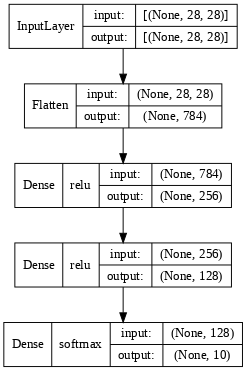

In [9]:
fnn_model = '/tmp/model_1.png'
plot_model(model, to_file='fnn_model.png', show_shapes=True,show_layer_names=False,dpi=69,show_layer_activations=True)

In [10]:
history = model.fit(X_train, y_train, epochs=6,batch_size=128 ,validation_data=(X_test,y_test))

Epoch 1/6
469/469 [==============================] - 9s 14ms/step - loss: 2.9847 - accuracy: 0.8791 - val_loss: 0.6756 - val_accuracy: 0.9219
Epoch 2/6
469/469 [==============================] - 5s 10ms/step - loss: 0.4423 - accuracy: 0.9385 - val_loss: 0.4364 - val_accuracy: 0.9368
Epoch 3/6
469/469 [==============================] - 9s 19ms/step - loss: 0.2436 - accuracy: 0.9557 - val_loss: 0.3502 - val_accuracy: 0.9487
Epoch 4/6
469/469 [==============================] - 9s 19ms/step - loss: 0.1603 - accuracy: 0.9664 - val_loss: 0.3300 - val_accuracy: 0.9481
Epoch 5/6
469/469 [==============================] - 6s 14ms/step - loss: 0.1291 - accuracy: 0.9708 - val_loss: 0.2825 - val_accuracy: 0.9556
Epoch 6/6
469/469 [==============================] - 5s 11ms/step - loss: 0.1138 - accuracy: 0.9729 - val_loss: 0.2349 - val_accuracy: 0.9604


In [11]:
loss, accuracy  = model.evaluate(X_test, y_test, verbose=False)
print(loss)
print(accuracy*100)

0.23492583632469177
96.03999853134155


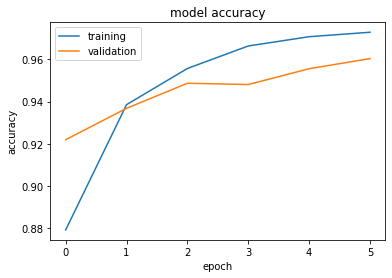

In [12]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

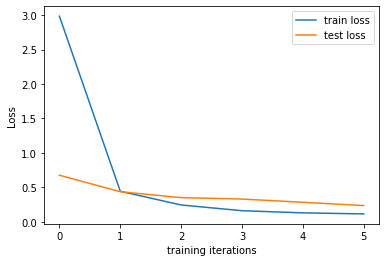

In [13]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='test loss')
plt.xlabel('training iterations')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [14]:
predictions = model.predict(X_test)
print(predictions)

313/313 [==============================] - 1s 3ms/step
[[1.67838553e-17 1.36018139e-20 3.82175828e-20 ... 9.99999702e-01
  4.59421777e-16 2.34237299e-13]
 [4.07083832e-33 7.19300131e-18 9.99999940e-01 ... 1.53734976e-25
  5.38719872e-21 3.33994503e-32]
 [4.46794802e-14 9.99572456e-01 8.61064109e-07 ... 4.25026752e-04
  9.65970131e-08 3.34963590e-09]
 ...
 [1.39854280e-21 6.40280365e-21 2.35210864e-15 ... 1.21116322e-12
  5.24289012e-09 1.32254740e-08]
 [1.45840493e-35 1.65036943e-23 4.94235894e-38 ... 8.45244667e-31
  3.75686343e-17 1.17679915e-33]
 [8.49406191e-35 0.00000000e+00 8.07344468e-24 ... 1.04301035e-36
  5.21399156e-27 4.74310323e-27]]


/usr/local/lib/python3.9/dist-packages/matplotlib/text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


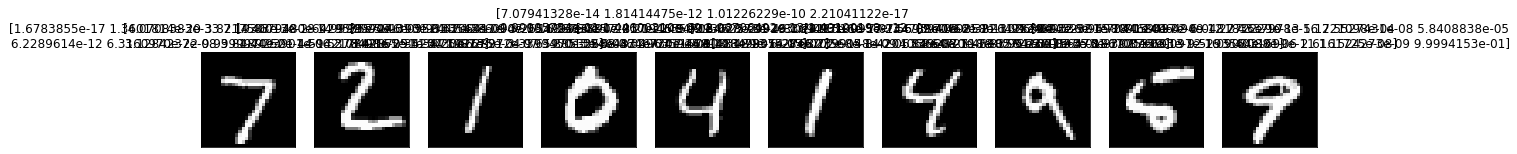

In [15]:
fig, axes = plt.subplots(ncols=10, sharex=False,
                         sharey=True, figsize=(20, 4))
for i in range(10):
    axes[i].set_title(predictions[i])
    axes[i].imshow(X_test[i], cmap='gray')
    axes[i].get_xaxis().set_visible(False)
    axes[i].get_yaxis().set_visible(False)
plt.show()

In [16]:
# Designing an FNN for MNIST classification
# Input layer: The input layer will have 784 neurons, corresponding to the 28x28 pixels in each MNIST image.
# Hidden layer: We used two hidden layers, each with a certain number of neurons 256,128.
# Activation function: We will use the ReLU (Rectified Linear Unit) activation function for the hidden layer.
# Output layer: The output layer will have 10 neurons, corresponding to the 10 possible classes (digits 0 to 9). We will use the softmax activation function for the output layer.
# Loss function: We will use the categorical_crossentropy loss function.
# Optimization algorithm: We will use the adam optimization algorithm.

# The input image of size (28, 28) is flattened to a 1D vector of length 784. Then, the first hidden layer with 256 neurons and ReLU activation is applied. 
# The output of the first hidden layer is passed through the second hidden layer with 128 neurons and ReLU activation. 
# Finally, the output of the second hidden layer is passed through the output layer with 10 neurons and softmax activation to obtain the predicted class probabilities.

In [17]:
# REFERENCE
# https://www.deeplearningwizard.com/deep_learning/practical_pytorch/pytorch_feedforward_neuralnetwork/
# https://machinelearningmastery.com/how-to-develop-a-convolutional-neural-network-from-scratch-for-mnist-handwritten-digit-classification/